**Homework #2- question 2**

In [34]:
# Importing all the required libraries.
from scipy.cluster.vq import vq, kmeans, whiten
import numpy as np
import re # Regular expression.
import matplotlib.pyplot as plt
import math
# Mounting the dataset from Google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
req_data = []
pattern = re.compile("^[^#]") # Extracting the required data from the dataset.

with open("cluster.txt") as f:
    nec_line = f.readlines()
    for l in nec_line:
        if re.search(pattern, l):
            req_data.append(l)

In [36]:
head = []
ear_left = []
ear_right = []
for ele in req_data:
    if(ele.split(" ")[-1] == 'Head\n'):
        head.append(ele.split(" ")[:2]) # Removing the white spaces and appending the data into the particular class (head).  
    elif(ele.split(" ")[-1] == 'Ear_left\n'):
        ear_left.append(ele.split(" ")[:2]) # Removing the white spaces and appending the data into the particular class (ear_left).
    else:
        ear_right.append(ele.split(" ")[:2]) # Removing the white spaces and appending the data into the particular class (ear_right).

In [37]:
features = np.vstack((head, ear_left, ear_right)) # Stacking the data in a single column.

2 (a). Use K-Means clustering with 3-clusters to label each (x, y) pair as Head, Ear Right, or Ear Left.

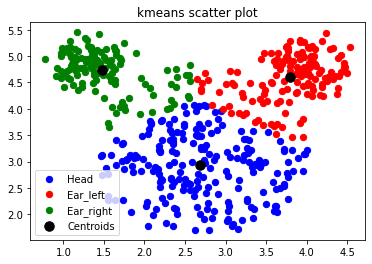

In [42]:
data = whiten(np.float32(features)) # Normalizing the data before clustering. 
centroids, mean_dist = kmeans(data, 3) # kmeans clustering of the data into three classes.
clusters, dist = vq(data, centroids) # Computing the centroid of the clusters.

plt.title("kmeans scatter plot")
plt.scatter(data[clusters == 0, 0], data[clusters == 0, 1], s = 40, c = 'blue', label = 'Head')
plt.scatter(data[clusters == 1, 0], data[clusters == 1, 1], s = 40, c = 'red', label = 'Ear_left')
plt.scatter(data[clusters == 2, 0], data[clusters == 2, 1], s = 40, c = 'green', label = 'Ear_right')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 90, c = 'black', label = 'Centroids')
plt.legend() 
plt.show()

In [56]:
comp = []

for ele in req_data:
    if ele.split(" ")[-1] == "Head\n":
        comp.append(0)
    elif ele.split(" ")[-1] == "Ear_right\n" or ele.split(" ")[-1] == "Ear_right":
        comp.append(2)
    else:
        comp.append(1)

confusion_matrix = [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]

for i in range(len(data)):
    if comp[i] == 0:
        if clusters[i] == 0:
            confusion_matrix[0][0] += 1

        elif clusters[i] ==1:
            confusion_matrix[1][0] += 1

        else:
            confusion_matrix[2][0] += 1
    if comp[i] == 1:
        if clusters[i] == 1:
            confusion_matrix[1][1] += 1

        elif clusters[i] ==0:
            confusion_matrix[0][1] += 1

        else:
            confusion_matrix[2][1] += 1
    if comp[i] == 2:
        if clusters[i] == 2:
            confusion_matrix[2][2] += 1

        elif clusters[i] == 0:
            confusion_matrix[0][2] += 1

        else:
            confusion_matrix[1][2] += 1

print("kmeans confusion matrix")
print("Head, Ear_left, Ear_right")

for i in range(len(confusion_matrix)):
    print(confusion_matrix[i])

kmeans confusion matrix
Head, Ear_left, Ear_right
[215, 0, 0]
[45, 0, 100]
[30, 100, 0]


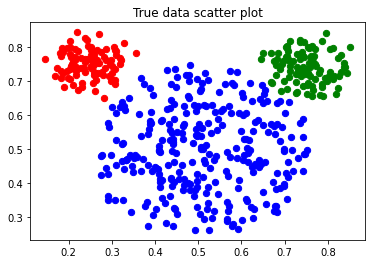

In [44]:
head = np.array(head)
ear_left = np.array(ear_left)
ear_right = np.array(ear_right)
plt.title("True data scatter plot")
plt.scatter(np.float32(head[:, 0]), np.float32(head[:, 1]),  s = 40, c = 'blue')
plt.scatter(np.float32(ear_left[:, 0]), np.float32(ear_left[:, 1]), s = 40, c = 'red')
plt.scatter(np.float32(ear_right[:, 0]), np.float32(ear_right[:, 1]), s = 40, c = 'green')
plt.show()

**2 (b). GMM classifier**

In [45]:
# Assigning integer values to the classes.
head1 = (clusters == 0)
ear_left1 = (clusters == 1)
ear_right1 = (clusters == 2)

In [46]:
def prob_def(x_n, mu_k, sigma_k): 
    arg1 = np.matmul((x_n-mu_k).reshape((1, 2)), np.linalg.inv(sigma_k))
    arg2 = np.matmul(arg1, (x_n-mu_k).reshape((2, 1)))
    num = math.exp((-1 / 2) * arg2)
    den = math.sqrt((2 * (math.pi)**2) * np.linalg.det(sigma_k))
    return (num / den)

def e_step():
    for k in range(3):
        for n in range(len(data)):
            den1 = w[0] * prob_def(features[n], mu[0], sig[0])
            den2 = w[1] * prob_def(features[n], mu[1], sig[1])
            den3 = w[2] * prob_def(features[n], mu[2], sig[2])
            num = w[k] * prob_def(features[n], mu[k], sig[k])
            den = den1 + den2 + den3 
            gamma[k][n] = num / den 

def m_step():
    for k in range(3):
        mu[k] =  np.dot(gamma[k], features) / (np.sum(gamma[k])) 
        temp = [[0.0, 0.0], [0.0, 0.0]]
        
        for n in range(len(features)):
            x = (features[n] - mu[k]).reshape((2, 1))
            y = x.T
            z = np.matmul(x, y)            
            temp = temp + gamma[k][n] * z / (np.sum(gamma[k])) 
            
        sig[k] = temp
        w[k] = (1 / len(features)) * np.sum(gamma[k]) 

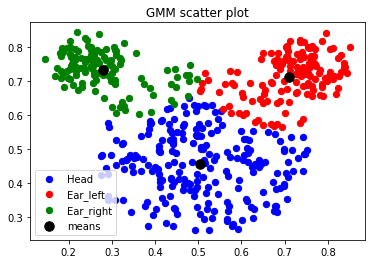

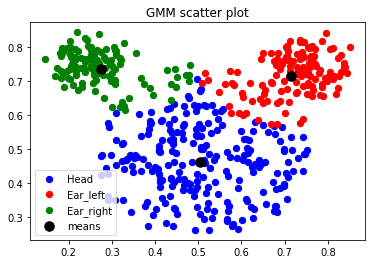

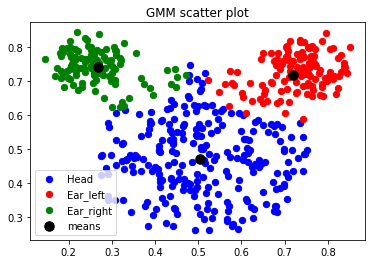

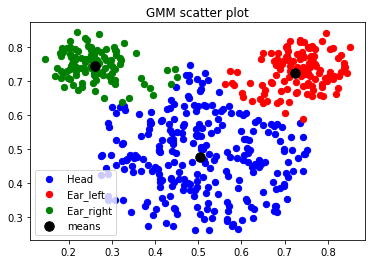

In [47]:
features = np.float32(features)

gamma_head = 1 * head1
gamma_ear_left = 1 * ear_left1
gamma_ear_right = 1 * ear_right1
gamma = [gamma_head, gamma_ear_left, gamma_ear_right]
gamma = np.array(np.float32(gamma))

mu = [[0.0,0.0], [0.0,0.0], [0.0,0.0]]
mu = np.array(mu)

# Co-variance matrix.
sig = [[[0.0,0.0],    
        [0.0,0.0]],
        [[0.0,0.0],
        [0.0,0.0]],
        [[0.0,0.0],
        [0.0,0.0]]]
sig = np.array(sig)

w = [0.0,0.0,0.0] # Weight vector.
w = np.array(w)

m_step()   

def pred_labels():  
  prediction = []
  
  for i in range(len(features)):
      if gamma[0][i] > gamma[1][i] and gamma[0][i] > gamma[2][i]:
          prediction.append(0)
      if gamma[1][i] > gamma[0][i] and gamma[1][i] > gamma[2][i]:
          prediction.append(1)
      if gamma[2][i] > gamma[1][i] and gamma[2][i] > gamma[0][i]:
          prediction.append(2)
  
  return prediction

def plot(prediction):
  prediction = np.array(prediction)
  plt.scatter(features[prediction == 0, 0], features[prediction == 0, 1], s = 40, c = 'blue', label = 'Head')
  plt.scatter(features[prediction == 1, 0], features[prediction == 1, 1], s = 40, c = 'red', label = 'Ear_left')
  plt.scatter(features[prediction == 2, 0], features[prediction == 2, 1], s = 40, c = 'green', label = 'Ear_right')
  plt.scatter(mu[:, 0], mu[:, 1], s = 90, c = 'black', label = 'means')
  plt.legend() 
  plt.title("GMM scatter plot")
  plt.show()

# Generation of scatter plots of the first four iterations.
for i in range(4):  
    e_step()
    m_step()
    pred = pred_labels()
    plot(pred)

In [48]:
for i in range(150):  
    e_step()
    m_step()
    predv = pred_labels()
    count = 0
    for m in range(len(predv)):
      if predv[m] == comp[m]:
        count += 1
    accuracy = (count / len(comp)) * 100
    if accuracy > 99: # Convergence threshold.
      break

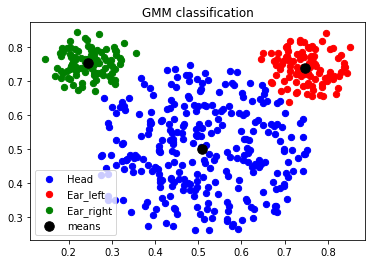

In [49]:
pred = np.array(predv)
plt.scatter(features[pred == 0, 0], features[pred == 0, 1], s = 40, c = 'blue', label = 'Head')
plt.scatter(features[pred == 1, 0], features[pred == 1, 1], s = 40, c = 'red', label = 'Ear_left')
plt.scatter(features[pred == 2, 0], features[pred == 2, 1], s = 40, c = 'green', label = 'Ear_right')
plt.scatter(mu[:,0], mu[:,1], s = 90, c = 'black', label = 'means')
plt.legend() 
plt.title("GMM classification")
plt.show()

In [50]:
confusion_matrix_GMM = [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]

for i in range(len(data)):
    if comp[i] == 0:
        if pred[i] == 0:
            confusion_matrix_GMM[0][0] += 1

        elif pred[i] ==1:
            confusion_matrix_GMM[1][0] += 1

        else:
            confusion_matrix_GMM[2][0] += 1

    if comp[i] == 1:
        if pred[i] == 1:
            confusion_matrix_GMM[1][1] += 1

        elif pred[i] ==0:
            confusion_matrix_GMM[0][1] += 1

        else:
            confusion_matrix_GMM[2][1] += 1

    if comp[i] == 2:
        if pred[i] == 2:
            confusion_matrix_GMM[2][2] += 1

        elif pred[i] == 0:
            confusion_matrix_GMM[0][2] += 1

        else:
            confusion_matrix_GMM[1][2] += 1

print("GMM confusion matrix")
print("Head, Ear_left, Ear_right")
for i in range(len(confusion_matrix)):
    print(confusion_matrix_GMM[i])

GMM confusion matrix
Head, Ear_left, Ear_right
[289, 1, 0]
[1, 0, 100]
[0, 99, 0]


In [78]:
print(accuracy) # Acuracy of the GMM classifier. 

99.18367346938776


It is concluded that the GMM classifier is better than the kmeans clustering for this dataset. Furthermore, in the GMM's confusion matrix- only 2 data are mislabelled whereas, in the kmeans confusion matrix- 75 data are mislabelled!
The GMM scatter plot resembles closely with the true data scatter plot proving that the GMM classifier produces more accurate results compared to the kmeans classifier.
